# Описание
Заказчик этого исследования — Министерство культуры Российской Федерации. Вам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю. Вы будете работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

## Исследование данных о российском кинопрокате



### Шаг 1. Откроем файлы с данными и объединим их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_movies = pd.read_csv('/datasets/mkrf_movies.csv')
data_shows = pd.read_csv('/datasets/mkrf_shows.csv')
#посмотрим на таблицы
display(data_movies.head(10))
display(data_shows.head(10).round())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


,puNumber,box_office
0,111000113,2450.0
1,111000115,61040.0
2,111000116,153030013.0
3,111000117,12260956.0
4,111000118,163684058.0
5,111000119,4293650.0
6,111000212,200.0
7,111000216,355567.0
8,111000313,710.0
9,111000314,1607970.0


In [3]:
#посмотрим на информацию о датасетах
data_movies.info()
data_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Для объединения таблиц выберем общий столбец: *puNumber*

In [4]:
#для объеденения, переведем данные в подходящий тип:
data_shows['puNumber'] = data_shows['puNumber'].astype('str')
data = data_movies.merge(data_shows, how='left', on='puNumber')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

**Вывод:** После объединения все данные из столбца *box_office* остались на месте - объединение прошло успешно.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверим типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Что мы видим:
* *show_start_date* нужно перевести в тип datetime;
* *ratings* нужно перевести в тип float64;
* в *film_studio* всего 18 пропусков;
* в *production_country* всего 2 пропуска;
* в *director* всего 9 пропусков;     
* в *producer* всего 568 пропусков;            

In [6]:
good_data = data.copy()
good_data['ratings'] = pd.to_numeric(data['ratings'],  errors='coerce')
good_data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S')
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   object             
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

In [7]:
data.shape[0] / good_data.shape[0]

1.0

**Вывод:**
* перевели данные в нужный тип в двух столбцах: *show_start_date* и *ratings*.

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [8]:
#будем проводить все операции в отдельной переменной good_data
good_data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   996
genres                    976
box_office               4328
dtype: int64

Большое количество пропусков в столбцах *refundable_support, nonrefundable_support, budget, financing_source* и *box_office*. Не вижу смысла убирать или заполнять данные, так как далеко не все фильмы имели гос. поддержку. Информация по общим сборам тоже отсутствует у многих фильмов, пока оставим без заполнения, чтобы не было искажения. По этой же причине оставим *ratings* без изменения.

Остальные значения заменим "пустышкой".


In [9]:
good_data['film_studio'] = good_data['film_studio'].fillna('Нет данных')
good_data['production_country'] = good_data['production_country'].fillna('Нет данных')
good_data['director'] = good_data['director'].fillna('Нет данных')
good_data['producer'] = good_data['producer'].fillna('Нет данных')
good_data['genres'] = good_data['genres'].fillna('Нет данных')
good_data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   996
genres                      0
box_office               4328
dtype: int64

**Вывод:** Заменили пропуски, где это возможно, там где уверенности нет - оставили без изменений.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [10]:
display('Полные дубликаты:', good_data.duplicated().sum())
display('Дубликаты названий:',good_data['title'].duplicated().sum())
display('Дубликаты номеров:',good_data['puNumber'].duplicated().sum())

'Полные дубликаты:'

0

'Дубликаты названий:'

714

'Дубликаты номеров:'

2

In [11]:
good_data['title'].value_counts()

День святого Валентина_                                            5
Безумцы                                                            4
Знакомство с Факерами 2.                                           4
Гарри Поттер и Дары Смерти - Часть 1/По роману Дж.К.Ролинг/        4
Жена путешественника во времени                                    4
                                                                  ..
ОХРАНА                                                             1
Ограбление по Фрейду                                               1
Американец (по роману Мартина Бута "Очень скрытный джентльмен")    1
Звёздные Войны: Скайуокер. Восход                                  1
Наш дом                                                            1
Name: title, Length: 6772, dtype: int64

In [12]:
good_data[good_data['title'] == 'День святого Валентина_']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3902,День святого Валентина_,221083810,2010-07-15 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
3991,День святого Валентина_,221068010,2010-05-14 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
4070,День святого Валентина_,121002210,2010-02-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
4196,День святого Валентина_,221136210,2010-11-30 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
5070,День святого Валентина_,221066410,2010-06-01 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN


In [13]:
good_data[good_data['title'] == 'Гарри Поттер и Дары Смерти - Часть 1/По роману Дж.К.Ролинг/']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
371,Гарри Поттер и Дары Смерти - Часть 1/По роману...,121026516,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Дэвид Йейтс,"Дейвид Баррон, Дейвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.1,"фэнтези,драма,детектив",745510.0
4198,Гарри Поттер и Дары Смерти - Часть 1/По роману...,121021010,2010-11-11 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Дэвид Йейтс,"Дейвид Баррон, Дейвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.1,"фэнтези,драма,детектив",1700.0
4526,Гарри Поттер и Дары Смерти - Часть 1/По роману...,221144910,2010-12-10 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Дэвид Йейтс,"Дейвид Баррон, Дейвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.1,"фэнтези,драма,детектив",NaN
5057,Гарри Поттер и Дары Смерти - Часть 1/По роману...,221068911,2011-05-18 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Дэвид Йейтс,"Дейвид Баррон, Дейвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.1,"фэнтези,драма,детектив",NaN


Повторяющиеся названия - одни и те же картины, выходившие в прокат в разные даты, номера удостоверений у них разные.

In [14]:
good_data[good_data['puNumber'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


Номера одинаковые, но фильмы - нет. Думаю что будет ошибкой удалять эти дубликаты, возможно в выгрузку закралась ошибка или фильмы крутились друг за другом - даты показа одинаковые.

**Вывод:** Дубликаты найдеты, но сокращать их нет смысла, их природа в целом ясна. Полных дубликатов в таблице нет.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [15]:
good_data['type'].value_counts()

Художественный                4520
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
 Анимационный                    1
Name: type, dtype: int64

In [16]:
good_data['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2851
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1593
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: age_restriction, dtype: int64

In [17]:
good_data['financing_source'].value_counts()

Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64

In [18]:
#исправляем пробелы в конце и в начале строки
good_data['type'] = good_data['type'].str.strip()
good_data['type'].value_counts()

Художественный                5909
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

**Вывод:** Проверили категориальные столбцы, в столбце *type* убрали пробелы в начале и конце строки. В остальных подобных столбцах подобного замечено не было.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [19]:
group = ['refundable_support', 'nonrefundable_support',
          'budget', 'box_office', 'ratings']
good_data[group].describe().round()

,refundable_support,nonrefundable_support,budget,box_office,ratings
count,332.0,332.0,3.320000e+02,3.158000e+03,6490.0
mean,11864458.0,48980989.0,1.272297e+08,7.647870e+07,6.0
std,24916555.0,59980118.0,1.885883e+08,2.403531e+08,1.0
min,0.0,0.0,0.000000e+00,0.000000e+00,1.0
25%,0.0,25000000.0,4.200000e+07,8.623900e+04,6.0
50%,0.0,30000000.0,6.864992e+07,2.327988e+06,7.0
75%,15000000.0,40375000.0,1.419853e+08,2.397967e+07,7.0
max,180000000.0,400000000.0,2.305074e+09,3.073569e+09,9.0


In [20]:
#посмотрим фильмы с нулевым бюджетом
good_data[good_data['budget'] == 0]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


Видим что все фильмы с "нулевым" бюджетом имеют какую-то поддержку, значит их бюджет не может быть меньше этой поддержки.

In [21]:
#исправим ситуцаию
def correct_budget(row):
    if row['budget'] < (row['refundable_support'] + row['nonrefundable_support']):
        return row['refundable_support'] + row['nonrefundable_support']
    return row['budget']
good_data['budget'] = good_data.apply(correct_budget, axis=1)
good_data.loc[2053]

title                                                 14+
puNumber                                        111023614
show_start_date                 2014-12-19 12:00:00+00:00
type                                       Художественный
film_studio                    ООО Киностудия  "Сентябрь"
production_country                                 Россия
director                                         А.Зайцев
producer                              О.Гранина, А.Зайцев
age_restriction           «16+» - для детей старше 16 лет
refundable_support                                    0.0
nonrefundable_support                          23000000.0
budget                                         23000000.0
financing_source         Министерство культуры, Фонд кино
ratings                                               6.6
genres                                          мелодрама
box_office                                     10234016.1
Name: 2053, dtype: object

Исправили ситуацию.

In [22]:
good_data[group].describe().round()

,refundable_support,nonrefundable_support,budget,box_office,ratings
count,332.0,332.0,3.320000e+02,3.158000e+03,6490.0
mean,11864458.0,48980989.0,1.314224e+08,7.647870e+07,6.0
std,24916555.0,59980118.0,1.871482e+08,2.403531e+08,1.0
min,0.0,0.0,6.000000e+06,0.000000e+00,1.0
25%,0.0,25000000.0,4.552480e+07,8.623900e+04,6.0
50%,0.0,30000000.0,7.119690e+07,2.327988e+06,7.0
75%,15000000.0,40375000.0,1.500000e+08,2.397967e+07,7.0
max,180000000.0,400000000.0,2.305074e+09,3.073569e+09,9.0


**Вывод:** Были исправлены подозрительные данные, где при наличии поддержки бюджет фильма был нулевым. Подобные строки были исправлены, чтобы они не вводили нас в заблуждение.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [23]:
good_data['show_start_year'] = good_data['show_start_date'].dt.year
good_data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Нет данных,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

Создадим функцию, которая будет брать первый (*зачастую основной*) жанр или фамилию, если там указано несколько.

In [24]:
def first_value(s, sep = ','):
    value_lst = s.split(sep=sep)
    return value_lst[0]

good_data['director_name'] = good_data['director'].apply(first_value)
good_data['genres_name'] = good_data['genres'].apply(first_value)  
good_data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,director_name,genres_name
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Нет данных,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [25]:
good_data['support_ratio'] = (good_data['refundable_support'] + good_data['nonrefundable_support']) / good_data['budget']
good_data.describe()

,refundable_support,nonrefundable_support,budget,ratings,box_office,show_start_year,support_ratio
count,3.320000e+02,3.320000e+02,3.320000e+02,6490.000000,3.158000e+03,7486.000000,332.000000
mean,1.186446e+07,4.898099e+07,1.314224e+08,6.479245,7.647870e+07,2014.594176,0.542098
std,2.491656e+07,5.998012e+07,1.871482e+08,1.101665,2.403531e+08,3.008452,0.196925
min,0.000000e+00,0.000000e+00,6.000000e+06,1.000000,0.000000e+00,2010.000000,0.044043
25%,0.000000e+00,2.500000e+07,4.552480e+07,5.900000,8.623900e+04,2012.000000,0.384615
50%,0.000000e+00,3.000000e+07,7.119690e+07,6.600000,2.327988e+06,2015.000000,0.614038
75%,1.500000e+07,4.037500e+07,1.500000e+08,7.200000,2.397967e+07,2017.000000,0.661412
max,1.800000e+08,4.000000e+08,2.305074e+09,9.200000,3.073569e+09,2019.000000,1.000000


**Вывод:** В ходе предобработки добавили несколько необходимых нам столбцов, обработали "подозрительные" данные, когда бюджет был меньше гос. поддержки. Исправили ошибки в категориальных столбцах. Явных дулбикатов обнаружено не было.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

show_start_year
2010    10.0
2011    18.0
2012    21.0
2013    28.0
2014    34.0
2015    66.0
2016    64.0
2017    71.0
2018    53.0
2019    57.0
dtype: float64


<AxesSubplot:title={'center':'Кол-во известных данных по годам'}, xlabel='show_start_year'>

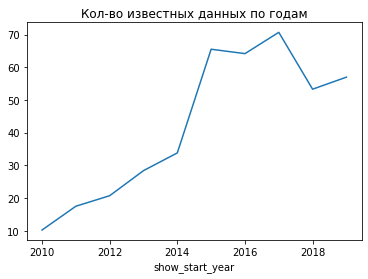

In [26]:
title_count = good_data.groupby('show_start_year')['title'].count()
box_office_count = good_data.loc[data['box_office'] > 0].groupby('show_start_year')['box_office'].count()
year_ratio = box_office_count/title_count*100
print(year_ratio.round())
plt.title('Кол-во известных данных по годам')
year_ratio.plot()

Самая высокая доля известных данных была в 2017 году. Рост статистики наблюдался до 2015 года, далее она собиралась с попеременным успехом.

<AxesSubplot:title={'center':'Кол-во показов в кинотеатах'}, xlabel='show_start_year'>

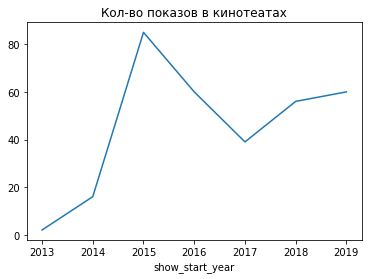

In [43]:
#количество фильмов, которые были показаны в кинотеатре
plt.title('Кол-во показов в кинотеатах')
good_data.groupby('show_start_year')['box_office'].count().plot()

Количество фильмов, которые выходили в кино росло до 2016 года, в 2017 был резкий спад, но с 2018 года рост продолжился с похожей динамикой.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

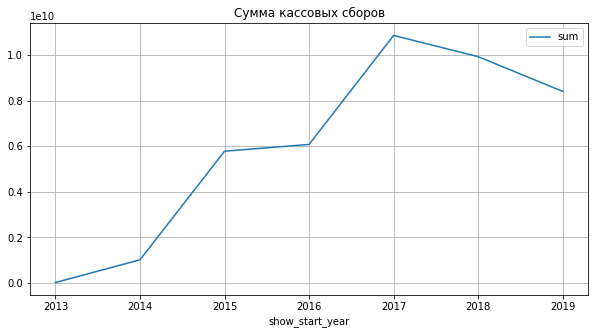

In [45]:
#сумма кассовых сборов по годам
box_per_year = good_data.pivot_table(index = 'show_start_year', values = 'box_office', aggfunc = 'sum')
box_per_year.columns = ['sum']
box_per_year.plot(y = 'sum', figsize = (10,5), grid = True, title = 'Сумма кассовых сборов');

Вижно что в с 2013 года начался рост кассовых сборов, который продлился до 2018 года, после которого началось небольшое падение. Из-за маленького количества данных за 2010-2013 года трудно судить о реальности данных.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

Text(0.5, 0, 'mean')

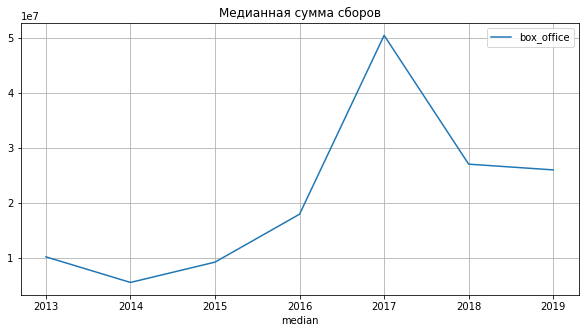

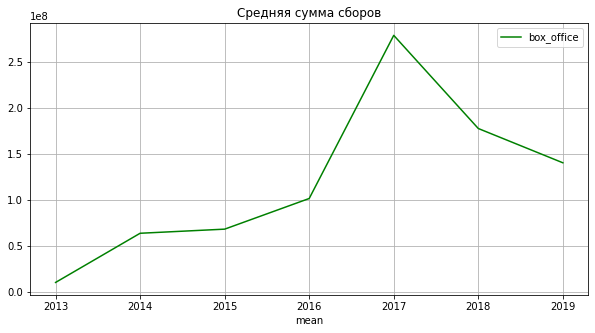

In [46]:
box_per_year = good_data.pivot_table(index = 'show_start_year', values = 'box_office', aggfunc = ['mean', 'median'])
box_per_year.plot(y = 'median', figsize = (10,5), grid = True, title = 'Медианная сумма сборов')
plt.xlabel('median')
box_per_year.plot(y = 'mean', figsize = (10,5), grid = True, color = 'green', title = 'Средняя сумма сборов')
plt.xlabel('mean')

Из-за недостатка данных до 2013 года мы не можем анализировать этот временной промежуток, однако исходя из того что у нас есть - 2017 год является самым успешным для кинопроката.
Медиана и средняя сильно различаются - это говорит нам о наличии фильмов с огромными сборами.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [30]:
good_data.query('2015 <= show_start_year').groupby('age_restriction')['box_office'].sum().sort_values()

age_restriction
«0+» - для любой зрительской аудитории    8.090774e+08
«18+» - запрещено для детей               4.075962e+10
«6+» - для детей старше 6 лет             5.579861e+10
«12+» - для детей старше 12 лет           6.061945e+10
«16+» - для детей старше 16 лет           7.603473e+10
Name: box_office, dtype: float64

Больше всего сборов у фильмов с рейтингом 16+

In [31]:
data_per_age = good_data.query('2015 <= show_start_year')
data_per_age = data_per_age.pivot_table(index = 'show_start_year', columns = 'age_restriction', values = 'box_office', aggfunc = 'sum').round()
data_per_age

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
show_start_year,,,,,
2015,379054578.0,1.361608e+10,1.136812e+10,5.432308e+09,8.701799e+09
2016,150228849.0,1.220445e+10,1.666455e+10,6.793930e+09,1.205315e+10
2017,229598930.0,7.851428e+09,1.874504e+10,9.651496e+09,1.208614e+10
2018,32449002.0,1.426729e+10,1.650360e+10,8.760086e+09,1.010497e+10
2019,17746067.0,1.268020e+10,1.275342e+10,1.012180e+10,1.285255e+10


<AxesSubplot:title={'center':'Сумма кассовых сборов'}, xlabel='show_start_year'>

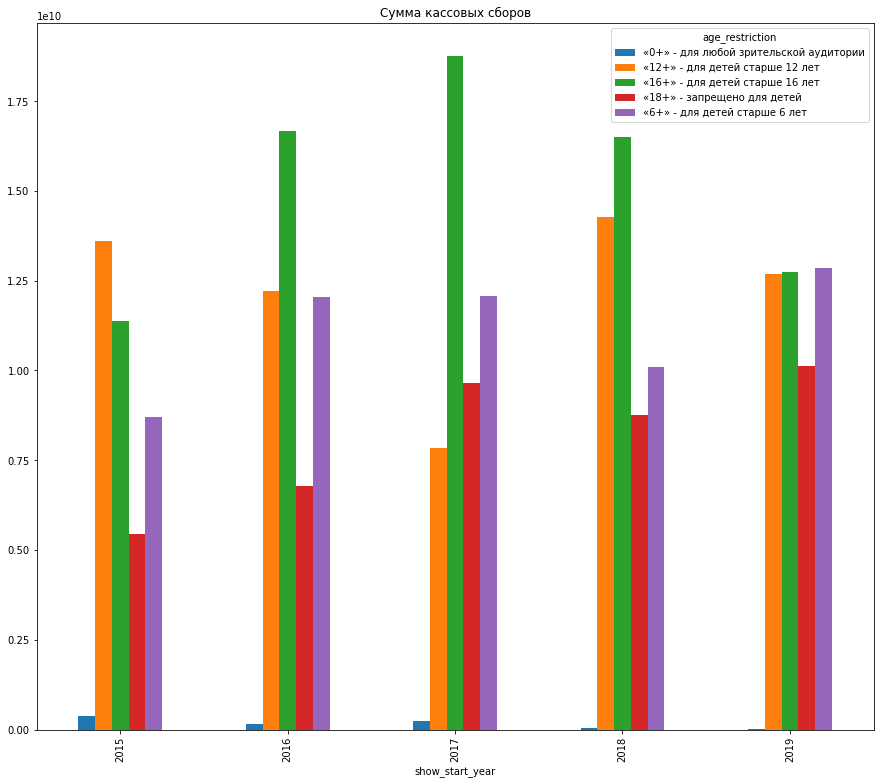

In [49]:
data_per_age.plot(kind='bar',figsize = (15,13), title = 'Сумма кассовых сборов')

Видим что от года к году суммы по возрастным категориям разнятся, например в 2015 году лидером по сборам стало кино 12+, а в 2019 - 6+.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Для начала выберем фильмы в которых есть хоть какая-то поддержка от госудатства.

In [33]:
good_data= good_data[good_data['support_ratio'].isna() == False]
good_data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,director_name,genres_name,support_ratio
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",365353.6,2013,А.Атанесян,драма,0.333703
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,Нет данных,28140.0,2014,А.Якимчук,Нет данных,0.700000
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",19957031.5,2013,Р.Давлетьяров,комедия,0.612691
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,55917.5,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.690095
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,232100.0,2014,М.Угаров,драма,0.624764


In [34]:
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 1281 to 7478
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  332 non-null    object             
 1   puNumber               332 non-null    object             
 2   show_start_date        332 non-null    datetime64[ns, UTC]
 3   type                   332 non-null    object             
 4   film_studio            332 non-null    object             
 5   production_country     332 non-null    object             
 6   director               332 non-null    object             
 7   producer               332 non-null    object             
 8   age_restriction        332 non-null    object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64        

332 строки, немного, но для первичного анализа хватит.

In [35]:
total_support  = good_data['nonrefundable_support'].sum() + good_data['refundable_support'].sum()
total_support

20200688312.0

Было выделено более 20 млрд. рублей в качестве гос. поддержки.

In [36]:
good_data['box_office'].sum()

42113509574.78

Сборы составили более 241 млрд. рублей. Суммарно фильмы себя окупили.

In [37]:
good_data['total_support'] = good_data['refundable_support'] + good_data['nonrefundable_support']
good_data['profit'] = good_data['box_office'] - good_data['budget']
good_data.describe()

,refundable_support,nonrefundable_support,budget,ratings,box_office,show_start_year,support_ratio,total_support,profit
count,3.320000e+02,3.320000e+02,3.320000e+02,314.000000,3.180000e+02,332.000000,332.000000,3.320000e+02,3.180000e+02
mean,1.186446e+07,4.898099e+07,1.314224e+08,6.000637,1.324324e+08,2016.719880,0.542098,6.084545e+07,4.256980e+05
std,2.491656e+07,5.998012e+07,1.871482e+08,1.123948,3.348379e+08,1.640637,0.196925,7.275546e+07,3.159104e+08
min,0.000000e+00,0.000000e+00,6.000000e+06,1.000000,1.550000e+03,2013.000000,0.044043,3.000000e+06,-1.971477e+09
25%,0.000000e+00,2.500000e+07,4.552480e+07,5.300000,1.236676e+06,2015.000000,0.384615,2.533375e+07,-7.069443e+07
50%,0.000000e+00,3.000000e+07,7.119690e+07,6.200000,1.572007e+07,2017.000000,0.614038,3.500000e+07,-4.068082e+07
75%,1.500000e+07,4.037500e+07,1.500000e+08,6.700000,1.063730e+08,2018.000000,0.661412,6.000000e+07,-2.362182e+06
max,1.800000e+08,4.000000e+08,2.305074e+09,8.500000,3.073569e+09,2019.000000,1.000000,5.000000e+08,2.913569e+09


Среднее соотношение поддержки - 54%, причем средняя прибыль - 425 т.р., но бОльшая часть фильмов является убыточной, значит в среднем - гос. поддержка не окупается, но есть бестселлеры, которые перекрывают соими сборами весь минус.

Text(0.5, 1.0, 'Количество фильмов, имеющих гос. поддержку')

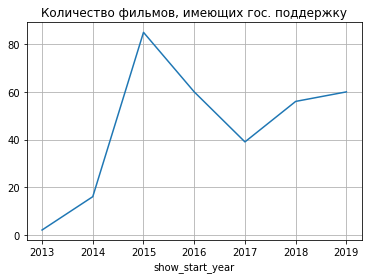

In [50]:
good_data.groupby('show_start_year')['total_support'].count().plot(grid=True)
plt.title('Количество фильмов, имеющих гос. поддержку')

Не смотря на данные до 2014 года из-за недостатка данных, видно что с 2015 по 2017 количество фильмов с гос.поддержкой падало, потом начало расти.

In [39]:
good_data = (good_data.query('budget > 0 and box_office > 0'))
total_support = good_data['refundable_support'].sum() + good_data['nonrefundable_support'].sum()
profit_ratio = good_data['box_office'].sum() /good_data['budget'].sum()
profit_ratio

1.0032248203337593

In [40]:
good_data['profit_ratio'] = good_data['box_office']/good_data['budget']
display('Максимальная окупаемость:',good_data['profit_ratio'].max())
display('Медианная окупаемость:',good_data['profit_ratio'].median())
display('Минимальная окупаемость:',good_data['profit_ratio'].min())

'Максимальная окупаемость:'

19.2098043174375

'Медианная окупаемость:'

0.17642032815058772

'Минимальная окупаемость:'

1.703296703296703e-05

In [41]:
display('Окупившиеся фильмы:',len(good_data[good_data['profit_ratio'] >=1]))

'Окупившиеся фильмы:'

79

In [42]:
display('Неокупившиеся фильмы:',len(good_data[good_data['profit_ratio'] <=1]))

'Неокупившиеся фильмы:'

239

**Вывод:** Всего у нас получилось 332 фильма с гос. поддержкой, из которых 79 - окупились, а 239 - нет. Максимальная прибыль составила в 19 раз больше вложений, медианная же касса - 17% от бюджета. Минимальная касса составила меньше одной сотой процента от вложений, негусто.

Пик гос. поддержки за рассматриваемый период - 2015 год, однако данных за 2013 и 2014 год не хватает, хотя было бы интересно посмотреть.

В целом, за счет хитов, окупаемость гос.поддержки более чем двадцатикратная.

### Шаг 5. Напишите общий вывод

Изначальный датасет представлял собой две разные таблицы, для удобства они были объединены и проверены на ошибки. Типы данных были переведены в нужные, пропуски в датафрейме, где было возможно, были заполнены, полных дубликатов обнаружено не было. Проблемы в столбцах с категориальными значениями были исправлены, все аномалии в количественных столбцах исправлены.

Также в таблицу были добавлены новые столбцы, а именно год проката, основные жанр и режиссер фильмов.

**В рамках исследовательского анализа были изучены:**
* доля фильмов с указанной информацией о прокате в кино по годам (*2017 год самый "информативный"*);
* количество фильмов, выходящих в проект в каждом году (*2016 год самый богатый на фильмы*);
* динамика проката по годам (*2018 год самый "объемный"*);
* средняя и медианная сумма сборов по годам (*в обоих случаях самым прибыльным оказался 2017 год*);
* сумма сборов в прокате по возрастной категории и по годам (*самая прибыльная категория - 16+, однако в разные года лидер менялся*);

**Также был произведен анализ фильмов, получивших государственную поддержку.**

За 7 лет было выделено более 20 млрд. рублей, сборы же составили более 421 млрд, однако судить по ним нельзя, так как учтены сборы во всех странах.

При общем расчете получилось что медианная окупаемость очень низкая (*17%*), хотя суммарная нормальная (*100,3%*), значит на гос. средства было снято несколько бестселлеров, которые доходами перекрывают весь минус.

Что же касается количественных показателей:
* 79 фильмов с гос. поддержкой окупились
* 239 фильмов не окупились
* по 14 фильмам нет данных о сборах

По итогу можно сделать вывод что фильмы, производство которых было поддержано государством, в среднем прибыль не приносят, более того, они даже не окупаются. Однако иногда снимаются и хиты, которые окупаются более чем в 19 раз.